::: {.callout-note collapse="true"}
## Learning Outcomes
* Recognize the value of feature engineering as a tool to improve model performance
* Implement polynominal feature generation and one hot encoding
* Understand the interactions between model complexity, model variance, and training error
:::

At this point in the course, we've equipped ourselves with some powerful techniques to build and optimize models. We've explored how to develop models of multiple variables, as well as how to fit these models to maximize their performance.

All of this was done with one major caveat: the regression models we've worked with so far are all **linear in the input variables**. We've assumed that our predictions should be some combination of linear variables. While this works well in some cases, the real world isn't always so straightforward. In today's lecture, we'll learn an important method to address this issue – and consider some new problems that can arise when we do so.

## Feature Engineering

Feature Engineering is the process of *transforming* the raw features into *more informative features* that can be used in modeling or EDA tasks.

Feature engineering allows you to:
Capture domain knowledge (e.g. periodicity or relationships between features).
Express non-linear relationships using simple linear models.
Encode non-numeric features to be used as inputs to models.
Example: Using the country of origin of a car as an input to modeling its efficiency.


Why doesn’t sklearn doesn’t have SquareRegression /PolynomialRegression.

- We can translate these into linear models with features that are polynomials of x.
- Feature engineering saves `sklearn` a lot of redundancy in their library.
- Linear models have really nice properties.



## Feature Functions

A feature function takes our original d dimensional input, $\mathbb{X}$, and transforms it into a $d'$ dimensional input $\Phi$.

For example, when we add the squared term of an existing column, we are effectively using kind of feature function, taking a $n \times 1$ matrix, $[hp]$, and turning it into an $n \times 2$ matrix $[hp,hp^2]$ 

As number of features grows, we can capture arbitrarily complex relationships.

Let's take a moment to dig further in to remind ourselves where this linearity comes from. Consider the following dataset on vehicles:

In [1]:
import seaborn as sns
vehicles = sns.load_dataset("mpg").rename(columns={"horsepower":"hp"}).dropna()
vehicles.head(5)

,mpg,cylinders,displacement,hp,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Suppose we wish to develop a model to predict a vehicle's fuel efficiency (`"mpg"`) as a function of its horsepower (`"hp"`). Glancing at the plot below, we see that the relationship between `"mpg"` and `"hp"` is non-linear – an SLR fit doesn't capture the relationship between the two variables.

<img src="images/degree_1.png" alt='degree_1' width='600'>

Recall our standard multiple linear regression model. In its current form, it is linear in terms of both $\theta_i$ and $x$:

$$\hat{y} = \theta_0 + \theta_1 x + \theta_2 x\:+\:...$$

Just by eyeballing the `vehicle` data plotted above, it seems that a *quadratic* model might be more appropriate. In other words, a model of the form below would likely do a better job of capturing the non-linear relationship between the two variables:

$$\hat{y} = \theta_0 + \theta_1 x + \theta_2 x^2$$

This looks fairly similar to our original multiple regression framework! Importantly, it is **still linear in $\theta_i$** – the prediction $\hat{y}$ is a linear combination of the model parameters. This means that we can use the same linear algebra methods as before to derive the optimal model parameters when fitting the model.

You may be wondering: how can this be a linear model if there is now a $x^2$ term? Although the model contains non-linear $x$ terms, it is linear with respect to the *model parameters*, $\theta_i$. Because our OLS derivation relied on assuming a linear model of $\theta_i$, the method is still valid to fit this new model.

If we refit the model with `"hp"` squared as its own feature, we see that the model follows the data much more closely.

$$\hat{\text{mpg}} = \theta_0 + \theta_1 (\text{hp}) + \theta_2 (\text{hp})^2$$

<img src="images/degree_2.png" alt='degree_2' width='600'>

Looks much better! What we've done here is called **feature engineering**: the process of transforming the raw features of a dataset into more informative features for modeling. By squaring the `"hp"` feature, we were able to create a new feature that signficantly improved the quality of our model.

We perform feature engineering by defining a **feature function**. A feature function is some function applied to the original variables in the data to generate one or more new features. More formally, a feature function is said to take a $d$ dimensional input and transform it to a $p$ dimensional input. This results in a new, feature-engineered design matrix that we rename $\Phi$.

$$\mathbb{X} \in \mathbb{R}^{n \times d} \longrightarrow \Phi \in \mathbb{R}^{n \times p}$$

In the `vehicles` example above, we applied a feature function to transform the original input with $d=1$ features into an engineered design matrix with $p=2$ features.

## One Hot Encoding
Feature engineering opens up a whole new set of possibilities for designing better performing models. As you will see in lab and homework, feature engineering is one of the most important parts of the entire modeling process.

A particularly powerful use of feature engineering is to allow us to perform regression on non-numeric features. **One hot encoding** is a feature engineering technique that generates numeric features from categorical data, allowing us to use our usual methods to fit a regression model on the data. 

To illustrate how this works, we'll refer back to the `tips` data from last lecture. Consider the `"day"` column of the dataset:

In [2]:
import numpy as np
np.random.seed(1337)
tips = sns.load_dataset("tips").sample(100)
tips[["day"]].head(5)

,day
54,Sun
46,Sun
86,Thur
199,Thur
106,Sat


   At first glance, it doesn't seem possible to fit a regression model to this data – we can't directly perform any mathematical operations on the entry "Thur". 
  
To resolve this, we instead create a new table with a feature for each unique value in the original `"day"` column. We then iterate through the `"day"` column. For each entry in `"day"` we fill the corresponding feature in the new table with 1. All other features are set to 0.

<img src="images/ohe.png" alt='ohe' width='600'>

This can be implemented in code using `pd.get_dummies` to generate the one hot encoding, then calling `pd.concat` to combine these new features with the original DataFrame.

In [3]:
#| code-fold: false
import pandas as pd

# Perform the one hot encoding
ohe = pd.get_dummies(tips["day"])

# Combine with original features
tips = pd.concat([tips, ohe], axis=1)
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size,Thur,Fri,Sat,Sun
54,25.56,4.34,Male,No,Sun,Dinner,4,0,0,0,1
46,22.23,5.00,Male,No,Sun,Dinner,2,0,0,0,1
86,13.03,2.00,Male,No,Thur,Lunch,2,1,0,0,0
199,13.51,2.00,Male,Yes,Thur,Lunch,2,1,0,0,0
106,20.49,4.06,Male,Yes,Sat,Dinner,2,0,0,1,0


Now, the data is ready to fit a model.

## Higher-order Polynomial Example

Let’s return to where we started today: Creating higher-order polynomial features for the mpg dataset.

What happens if we add a feature corresponding to the horsepower cubed?
 -Will we get better results?
 -What will the model look like?

Let’s try it out:

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


vehicle_data = sns.load_dataset("mpg")
vehicle_data = vehicle_data.rename(columns = {"horsepower": "hp"})
vehicle_data = vehicle_data.dropna()


def get_MSE_for_degree_k_model(k):
    pipelined_model = Pipeline([
        ('poly_transform', PolynomialFeatures(degree = k)),
        ('regression', LinearRegression(fit_intercept = True))    
    ])
    pipelined_model.fit(vehicle_data[["hp"]], vehicle_data["mpg"])
    return mean_squared_error(pipelined_model.predict(vehicle_data[["hp"]]), vehicle_data["mpg"])

ks = np.array(range(0, 7))
MSEs = [get_MSE_for_degree_k_model(k) for k in ks]
MSEs_and_k = pd.DataFrame({"k": ks, "MSE": MSEs})
MSEs_and_k.set_index("k")




def plot_degree_k_model(k):
    pipelined_model = Pipeline([
        ('poly_transform', PolynomialFeatures(degree = k)),
        ('regression', LinearRegression(fit_intercept = True))    
    ])
    pipelined_model.fit(vehicle_data[["hp"]], vehicle_data["mpg"])
    
    fig,ax = plt.subplots()

    ax.scatter(x=vehicle_data['hp'], y = vehicle_data['mpg'])
    
    x_range = np.linspace(45, 210, 100)

    ax.plot(x_range, pipelined_model.predict(x_range.reshape(-1, 1)), color = "red")
    ax.set_xlabel("hp")
    ax.set_ylabel("mpg")
    return fig



We can plot each polynomial separately and analyze their performance.

k       1.000000
MSE    23.943663
Name: 1, dtype: float64


c:\Users\phanm\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



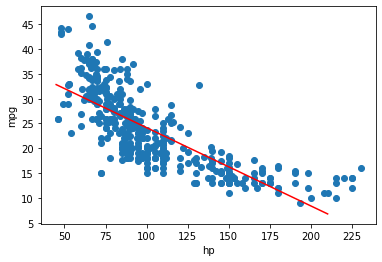

In [55]:
plot_degree_k_model(1);
print(MSEs_and_k.loc[1,:])

Not that good, there seems to be a pattern in our errors.

k       2.000000
MSE    18.984769
Name: 2, dtype: float64


c:\Users\phanm\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



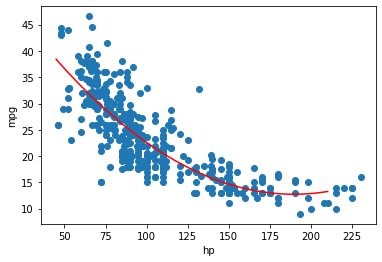

In [54]:
plot_degree_k_model(2);
print(MSEs_and_k.loc[2,:])

This plot seems to match our data much more consistently across `hp` values

k       3.00000
MSE    18.94499
Name: 3, dtype: float64


c:\Users\phanm\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



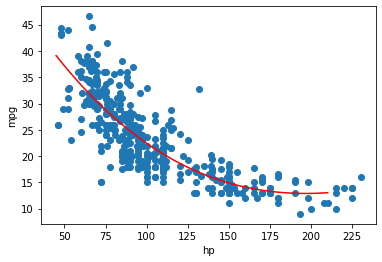

In [53]:
plot_degree_k_model(3);
print(MSEs_and_k.loc[3,:])

With a cubic term, we observe a small improvement in MSE.

Qualitatively, the curve looks quite similar. Only slightly better prediction power, but what happens if we add even higher order features?




k       4.000000
MSE    18.876333
Name: 4, dtype: float64


c:\Users\phanm\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



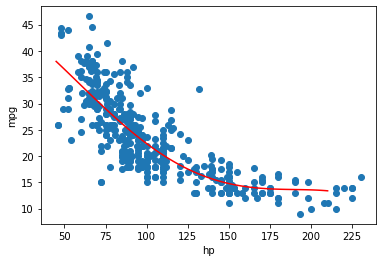

In [58]:
plot_degree_k_model(4);
print(MSEs_and_k.loc[4,:])


k       5.000000
MSE    18.426969
Name: 5, dtype: float64


c:\Users\phanm\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



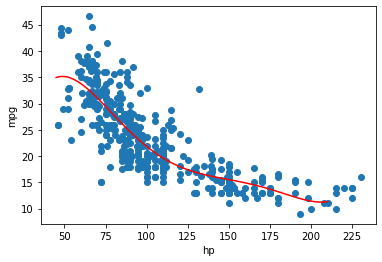

In [59]:
plot_degree_k_model(5);
print(MSEs_and_k.loc[5,:])

It seems we have hit a plateau ever since we reached 18mpg. However, it is still improving bit by bit. This trend will continue as we add more and more terms to our model. However, there ain't no free lunch. This decreasing of the MSE is coming at a major cost!


## Variance and Training Error

We've seen now that feature engineering allows us to build all sorts of features to improve the performance of the model. In particular, we saw that designing a more complex feature (squaring `"hp"` in the `vehicles` data previously) substantially improved the model's ability to capture non-linear relationships. To take full advantage of this, we might be inclined to design increasingly complex features. Consider the following three models, each of different order (the maximum exponent power of each model):

* Model with order 1: $\hat{\text{mpg}} = \theta_0 + \theta_1 (\text{hp})$
* Model with order 2: $\hat{\text{mpg}} = \theta_0 + \theta_1 (\text{hp}) + \theta_2 (\text{hp})^2$
* Model with order 4: $\hat{\text{mpg}} = \theta_0 + \theta_1 (\text{hp}) + \theta_2 (\text{hp})^2 + \theta_3 (\text{hp})^3 + \theta_4 (\text{hp})^4$

<br/>

<img src="images/degree_comparison.png" alt='degree_comparison' width='800'>

When we use our model to make predictions on the same data that was used to fit the model, we find that the MSE decreases with increasingly complex models. The **training error** is the model's error when generating predictions from the same data that was used for training purposes. We can conclude that the training error goes down as the complexity of the model increases. 

<img src="images/train_error.png" alt='train_error' width='500'>

This seems like good news – when working on the **training data**, we can improve model performance by designing increasingly complex models. 

However, high model complexity comes with its own set of issues. When a model has many complicated features, it becomes increasingly sensitive to the data used to fit it. Even a small variation in the data points used to train the model may result in wildly different results for the fitted model. The plots below illustrate this idea. In each case, we've fit a model to two very similar sets of data (in fact, they only differ by two data points!). Notice that the model with order 2 appears roughly the same across the two sets of data; in contrast, the model with order 4 changes erratically across the two datasets.

<img src="images/model_variance.png" alt='model_variance' width='600'>

The sensitivity of the model to the data used to train it is called the **model variance**. As we saw above, model variance tends to increase with model complexity. 

<img src="images/bvt.png" alt='bvt' width='500'>

## Overfitting

We can see that there is a clear "trade-off" that comes from the complexity of our model. As model complexity increases, the model's error on the training data decreases. At the same time, the model's variance tends to increase.

Why does this matter? To answer this question, let's take a moment to review our modeling workflow when making predictions on new data. 

1. Sample a dataset of training data from the real world
2. Use this training data to fit a model
3. Apply this fitted model to generate predictions on unseen data 

This first step – sampling training data – is important to remember in our analysis. As we saw above, a highly complex model may produce results that vary wildly across different samples of training data. If we happen to sample a set of training data that is a poor representation of the population we are trying to model, our model may perform poorly on any new set of data it has not seen before.

To see why, consider a model fit using the training data shown on the left. Because the model is so complex, it achieves zero error on the training set – it perfectly predicts each value in the training data! When we go to use this model to make predictions on a new sample of data, however, things aren't so good. The model now has enormous error on the unseen data. 

<img src="images/overfit.png" alt='overfit' width='600'>

The phenomenon above is called **overfitting**. The model effectively just memorized the training data it encountered when it was fitted, leaving it unable to handle new situations. 

The takeaway here: we need to strike a balance in the complexity of our models. A model that is too simple won't be able to capture the key relationships between our variables of interest; a model that is too complex runs the risk of overfitting. 

This begs the question: how do we control the complexity of a model? Stay tuned for the next lecture.